# Spotify Data Analysis using Python(OTOT C Task)🎼

## Introduction:

In this notebook, we will delve into the dataset containing information about the top Spotify songs of 2023. Our objective is to analyze the trends, patterns, and insights behind these chart-topping hits.











## Dataset Overview
This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

Dataset: [Top Spotify Songs 2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data)







## Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset file

In [ ]:
!pip install chardet
import chardet

dataset_path = '/content/drive/MyDrive/NUS_SEM_2_(Jan2024_May2024)/Info Viz/Assignments/OTOT_C/Dataset/spotify-2023.csv'

with open(dataset_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
    encoding = result['encoding']

data = pd.read_csv(dataset_path, encoding=encoding)

### Displaying the first few rows of the dataset to understand its structure

In [ ]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Explore the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### Shape of DataSet

In [ ]:

print(f"Number of column :{data.shape[1]}\nNumber of rows :{data.shape[0]}")

Number of column :24
Number of rows :953


## Data Preprocessing





### checking for null values

In [ ]:
data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Handling the null values by removing it from data

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

### Check for duplicate rows

In [ ]:
data.duplicated().sum()

0

#### Checking incorrect datatypes

The following columns have incorrect datatypes:

- streams
- in_deezer_playlists
- in_shazam_charts

The datatype for these columns will be converted into int64.

In [ ]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

In [ ]:
data['in_deezer_playlists']= pd.to_numeric(data['in_deezer_playlists'], errors= 'coerce')

data['in_deezer_playlists']= pd.to_numeric(data['in_deezer_playlists'], errors= 'coerce')

In [ ]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


### Renaming columns

In [ ]:
data.rename(columns = {'released_year':'Year', 'released_month':'Month', 'released_day':'Day'}, inplace = True)

In [ ]:
data= data.rename(columns= ({'artist(s)_name':'artists_name'}))

In [ ]:
#rename and reformat
data = data.rename(columns=({'danceability_%':'danceability'}))
data = data.rename(columns=({'valence_%':'valence'}))
data = data.rename(columns=({'energy_%':'energy'}))
data = data.rename(columns=({'acousticness_%':'acousticness'}))
data = data.rename(columns=({'instrumentalness_%':'instrumentalness'}))
data = data.rename(columns=({'liveness_%':'liveness'}))
data = data.rename(columns=({'speechiness_%':'speechiness'}))

# **Data Visualisation**

### **Distribution of Streams by Key Signature using Violin Plot**

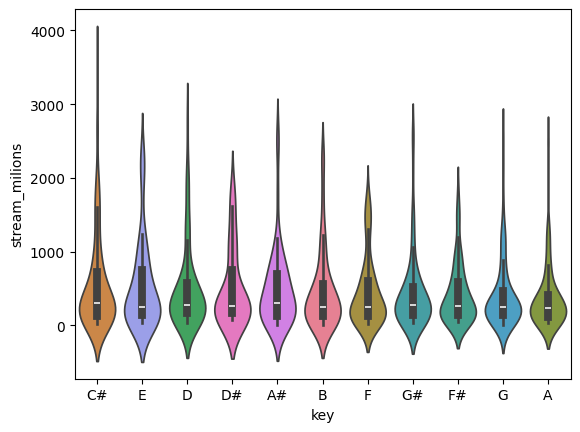

<Figure size 2000x1000 with 0 Axes>

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

data['stream_milions'] = data['streams']/1000000
average_order = data.groupby('key')['streams'].mean().sort_values(ascending=False).index.tolist()

sns.violinplot(x='key', y='stream_milions', data=data, hue='key', order=average_order)
plt.figure(figsize=(20,10))
plt.show()

Violin plot illustrating the distribution of streams (in millions) for different key signatures. The data shows that the key of C# has the highest median stream count,  key A have lesser stream count. The plot is ordered based on the average stream count for each key signature.

### **Scatter plot with linear regression line showing the relationship between number of artists and streams**

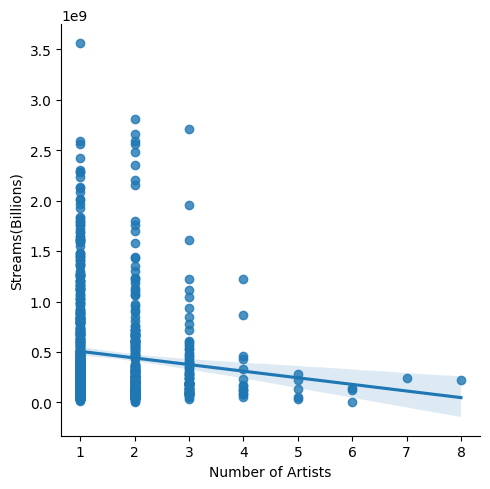

In [ ]:


# Rename the "artist_count" column to "num_artists"
data.rename(columns={"artist_count": "num_artists"}, inplace=True)

# Create the lmplot
sns.lmplot(y="streams", x="num_artists", data=data)

# Label the x-axis with "Number of Artists"
plt.xlabel("Number of Artists")

# Label the y-axis with "Streams(Billions)"
plt.ylabel("Streams(Billions)")
# Show the plot
plt.show()

Stream count gets affected  negatively as Number of collaborators in the song increases. Data suggests that songs by individual artists tend to achieve greater popularity compared to music by groups .

### **Bar plot showing the top 15 artists with the most songs in the dataset.**

<ipython-input-53-f2d42898f2e1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_artists.values, y=top_artists.index, palette='mako')


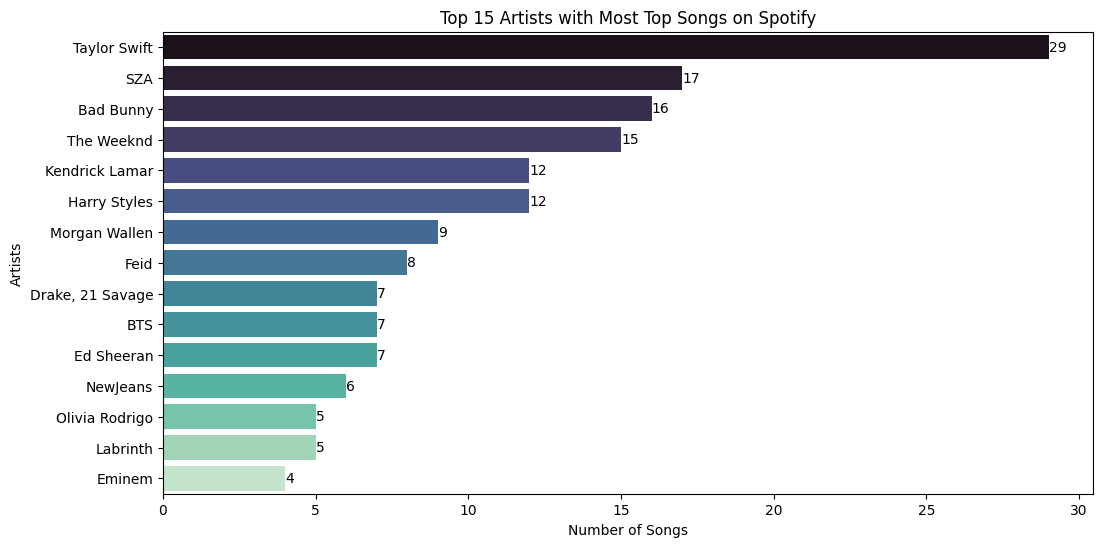

In [ ]:


# Top 15 artists with the most songs in the dataset
top_artists = data['artists_name'].value_counts().head(15)

# Visualization using the "mako" color palette
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_artists.values, y=top_artists.index, palette='mako')

# Annotating each bar with the count of songs
for index, value in enumerate(top_artists.values):
    barplot.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.xlabel('Number of Songs')
plt.ylabel('Artists')
plt.title('Top 15 Artists with Most Top Songs on Spotify')
plt.show()




Based on the analysis, Taylor Swift emerged as one of the top artists with most number of songs

### **Heatmap showing the correlation coefficients between different audio features.**

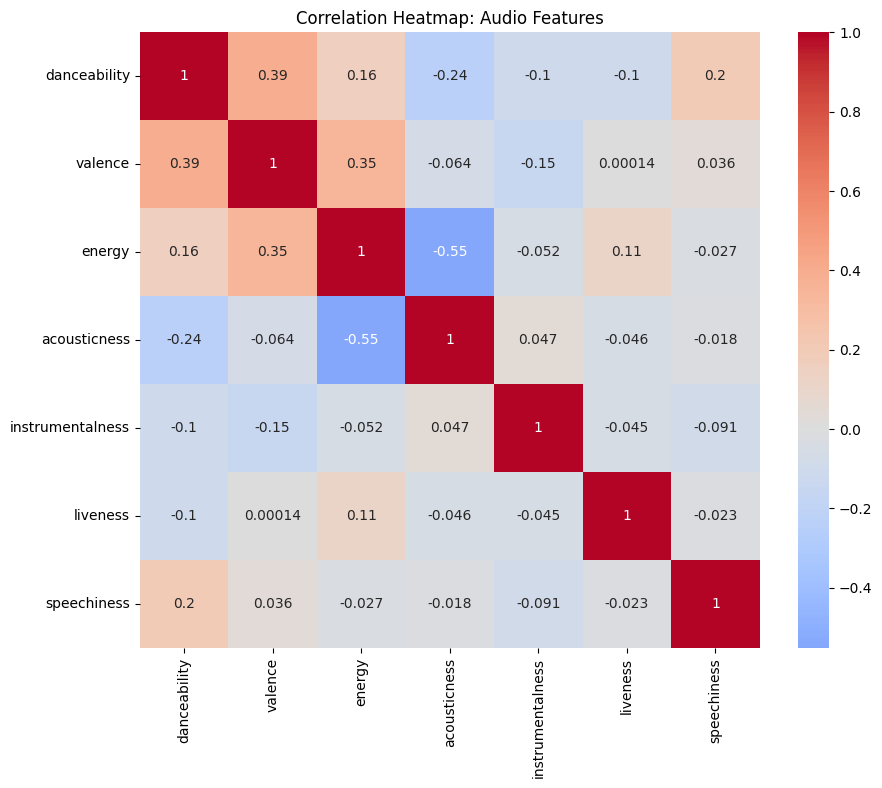

In [ ]:
audio_features_columns = [
    'danceability', 'valence', 'energy', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness'
]

# Calculate the correlation matrix
correlation_matrix = data[audio_features_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Audio Features')
plt.show()

Danceable Songs: The analysis reveals that there is a moderate positive correlation between danceability and valence. This suggests that when aiming to create a song with a danceable quality, it is more likely to have a positive or cheerful mood, as indicated by its valence.


Energetic Songs: Interestingly, a moderate negative correlation is observed between acousticness and energy. This implies that songs with lower acousticness, meaning they are less reliant on acoustic instruments and more focused on electronic or produced elements, tend to exhibit higher energy levels. Therefore, if the goal is to create a song with a high level of energy, it may be effective to reduce acoustic elements and incorporate more electronic or produced sounds.